In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime

In [2]:
uber_df=pd.read_csv("My Uber Drives - 2016.csv")

In [3]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
# Remove uncessary data
uber_df = uber_df[:-1]

In [6]:
# fix data types of data columns

def convert_time(column_name):
    y=[]
    for x in uber_df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    uber_df[column_name] = y

In [7]:
column_date=uber_df[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [8]:
# check that all data is fixed and ready to work on it
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


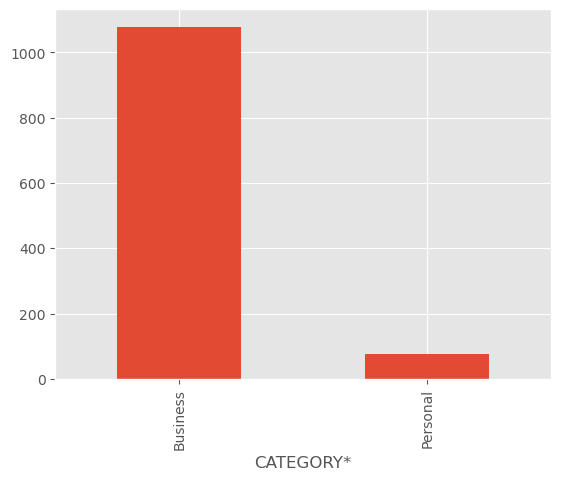

In [9]:
# number of trip at each category
x = uber_df['CATEGORY*'].value_counts().plot(kind='bar')

In [10]:
#extract month from start date
count = 0
month=[]
while count < len(uber_df):
    month.append(uber_df['START_DATE*'][count].month)
    count = count+1
uber_df['Month'] = month

In [11]:
# calculate duration of each trip in minutes
minutes=[]
uber_df['Duration_Minutes'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
uber_df['Duration_Minutes']
for x in uber_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)

uber_df['Duration_Minutes'] = minutes

Text(0.5, 1.0, 'Number of trips per Month')

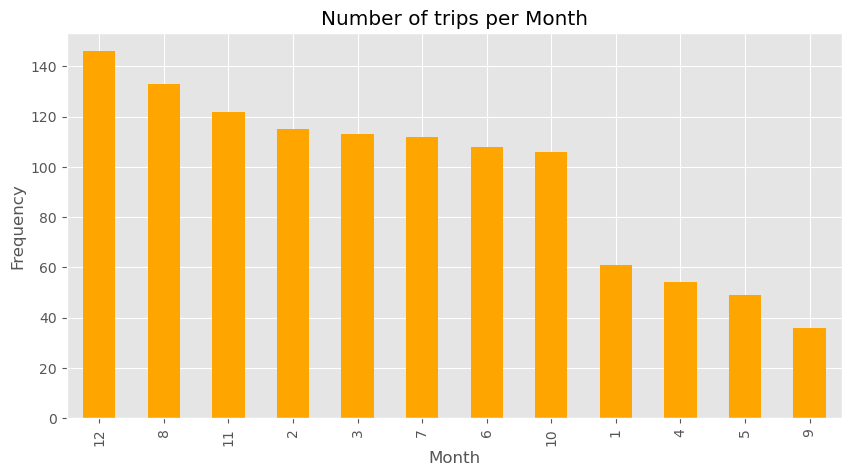

In [12]:
# plot number of trips at each month
x = uber_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

Text(0.5, 1.0, 'Number of trips per hour')

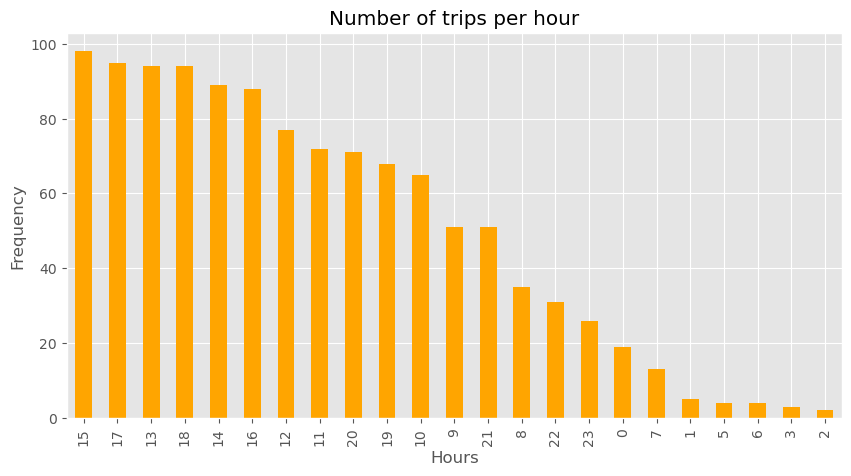

In [13]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = uber_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

<Axes: xlabel='PURPOSE*'>

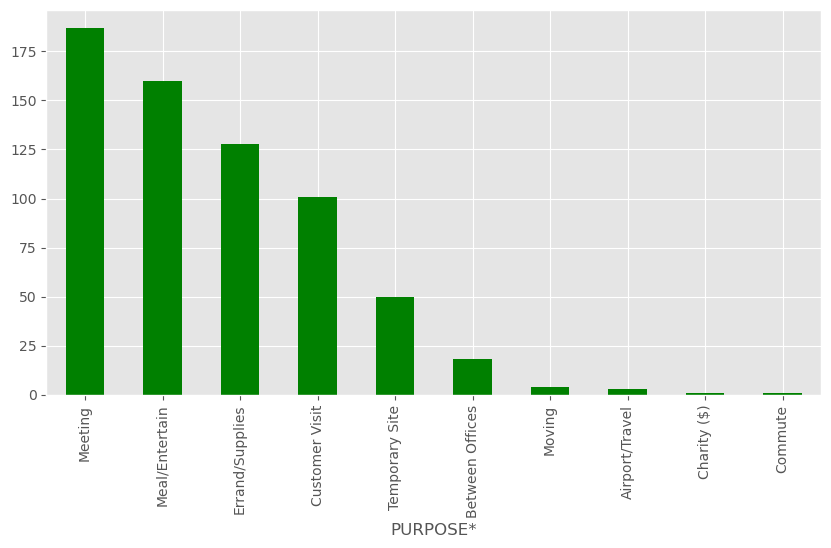

In [15]:
# see how many trips made by each purpose
purpose_time = uber_df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green')

In [18]:
# calculate trip speed for each driver
uber_df['Duration_hours'] = uber_df['Duration_Minutes'] / 60
uber_df['Speed_KM'] = uber_df['MILES*'] / uber_df['Duration_hours']
uber_df['Speed_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
1154    28.077670
Name: Speed_KM, Length: 1155, dtype: float64